#### **Intro**

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [120]:
fires = pd.read_csv('forestfires.csv')

In [121]:
fires

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


#### **Intro to the different columns** 

- **X**: X-axis spatial coordinate within the Montesinho park map: 1 to 9
- **Y**: Y-axis spatial coordinate within the Montesinho park map: 2 to 9
- **month**: Month of the year: 'jan' to 'dec'
- **day**: Day of the week: 'mon' to 'sun'
- **FFMC**: Fine Fuel Moisture Code index from the FWI system: 18.7 to 96.20
- **DMC**: The Duff Moisture Code (DMC) represents fuel moisture of decomposed organic material underneath the litter. System designers suggest that it is represents moisture conditions for the equivalent of 15-day (or 360 hr) timelag fuels. Values range from: 1.1 to 291.3
- **DC**: Drought Code index from the FWI system: 7.9 to 860.6
- **ISI**: Initial Spread Index from the FWI system: 0.0 to 56.10
- **temp**: Temperature in Celsius degrees: 2.2 to 33.30
- **RH**: Relative humidity in percentage: 15.0 to 100
- **wind**: Wind speed in km/h: 0.40 to 9.40
- **rain**: Outside rain in mm/m2 : 0.0 to 6.4
- **area**: The burned area of the forest (in ha): 0.00 to 1090.84

#### **Data cleaning**

In [122]:
fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


Transform month and day to integer columns

In [131]:
fires['month'] = pd.to_datetime(fires['month'],format='%b').dt.month
convert_day = {'mon':1,'tue':2,'wed':3,'thu':4,'fri':5,'sat':6,'sun':7}
fires['day'] = fires['day'].map(convert_day)

#### **When does most forest fires occur?**

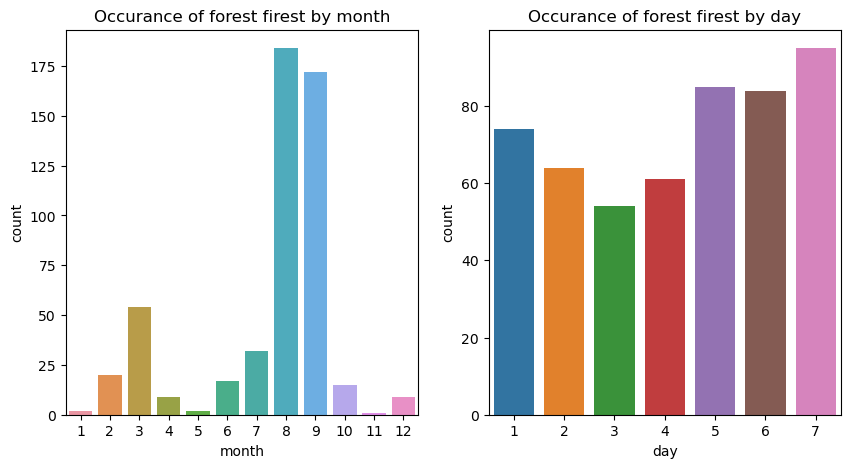

In [132]:
fig, ax = plt.subplots(ncols=2,nrows=1,figsize=(10,5))

ax[0].set_title('Occurance of forest firest by month')
ax[1].set_title('Occurance of forest firest by day')

ax[0].set_ylabel('Number of forest fires')
ax[1].set_ylabel('Number of forest fires')

sns.countplot(data = fires,x = 'month',ax=ax[0])
sns.countplot(data = fires,x = 'day',ax=ax[1])

plt.show()

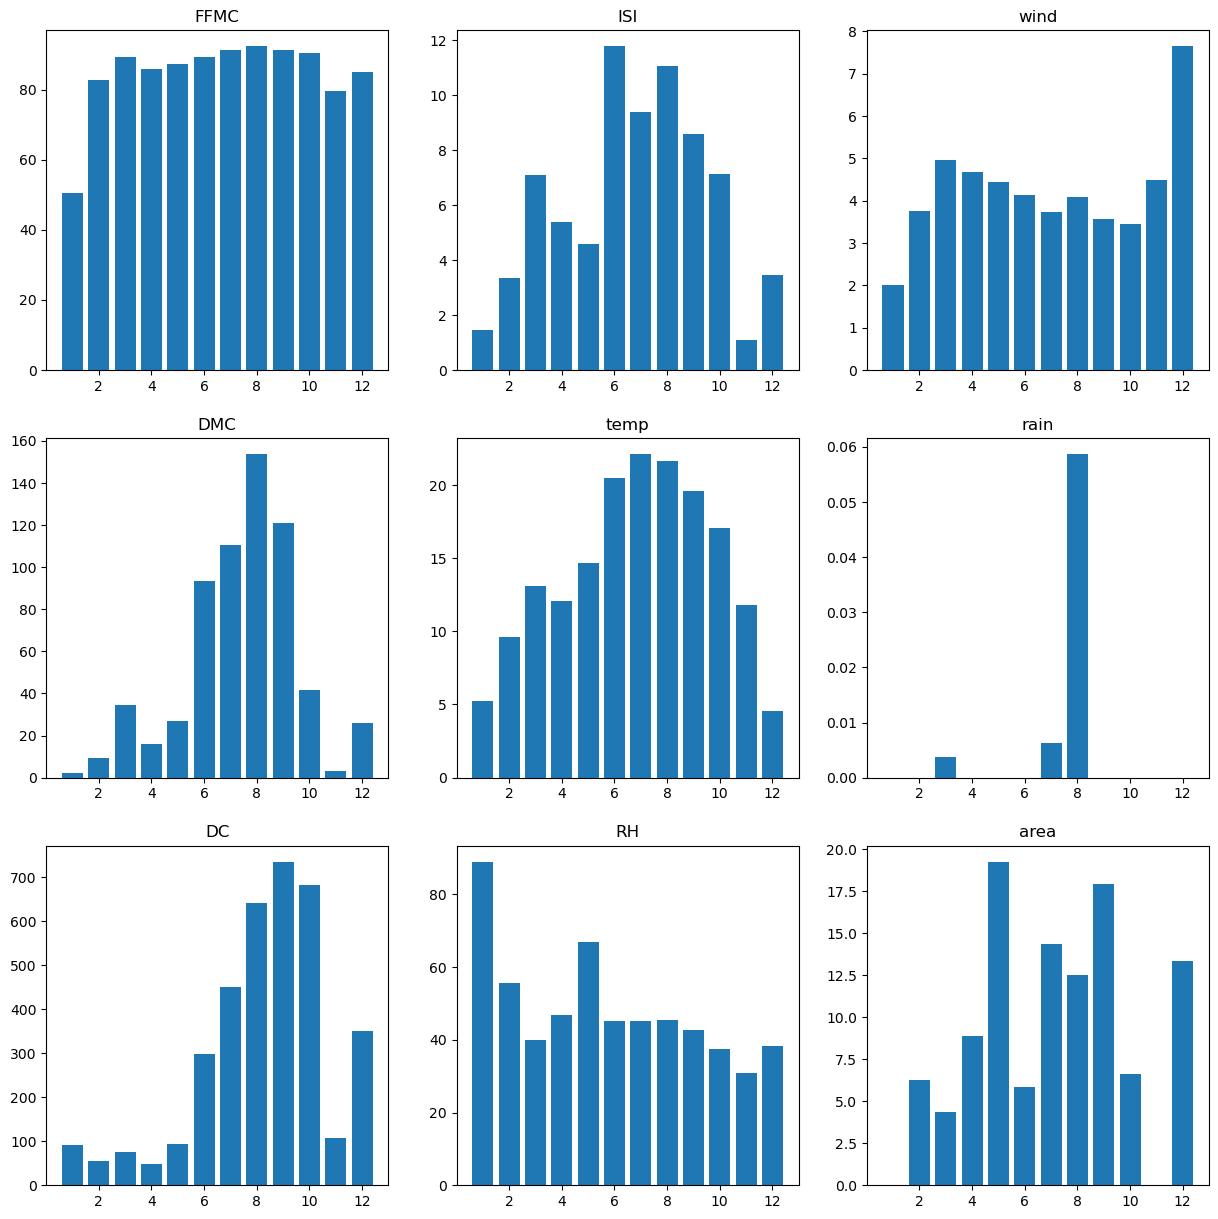

In [138]:
fig,axes = plt.subplots(ncols=3,nrows=3, figsize=(15,15))
columns = fires.columns[4:]
col_index = 0
for col in range(3):
    for row in range(3):
        month_mean = fires.groupby(by='month')[columns[col_index]].mean()
        axes[row,col].set_title(columns[col_index])
        col_index +=1

        axes[row,col].bar(height=month_mean,x=month_mean.index)
        
        

#fig.suptitle('monthly distribution of various values')


#### **Extractions from monthly distributions**


 - Here, we can see that some of the columns (DC,temp,DMC,ISI) seems to have larger values during months which is more prevalent of forest fires (aug-sep)

  - Interesting here is that the rain is peaking during august, the month with the most forest fires. 

Now, lets have a look at the severity of forest fires. In this case, we have no indicator of "severity", so lets instead choose area as a proxy for severity. Lets create scatterplots for all columns, and see if we can find any patterns.

Text(0.5, 0.98, 'Scatterplot of different columns and area')

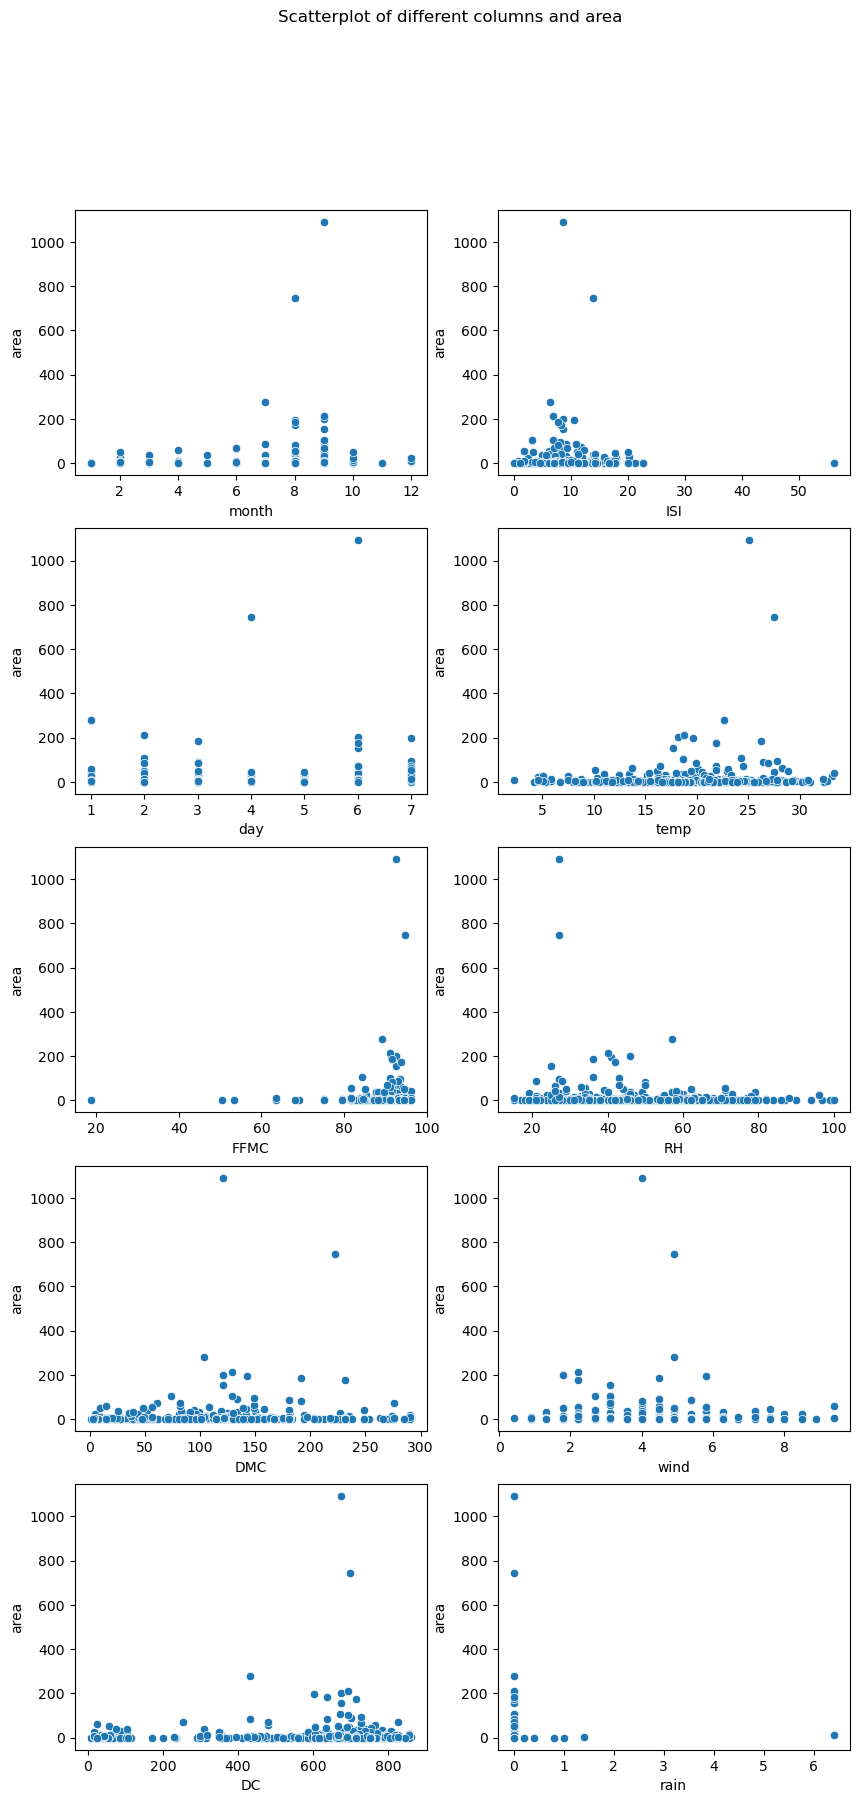

In [149]:
columns = fires.drop(['area','X','Y'],axis=1).columns
fig, axes = plt.subplots(5,2,figsize=(10,20))
col_index = 0
for col in range(2):
    for row in range(5):
        sns.scatterplot(data= fires,y='area',x=columns[col_index],ax=axes[row,col])
        #axes[row,col].set_title(columns[col_index])
        col_index +=1

#fig.suptitle('Scatterplot of different columns and area')

In [152]:
fires.corr()['area']

X        0.063385
Y        0.044873
month    0.056496
day      0.023226
FFMC     0.040122
DMC      0.072994
DC       0.049383
ISI      0.008258
temp     0.097844
RH      -0.075519
wind     0.012317
rain    -0.007366
area     1.000000
Name: area, dtype: float64

<AxesSubplot:xlabel='area', ylabel='Count'>

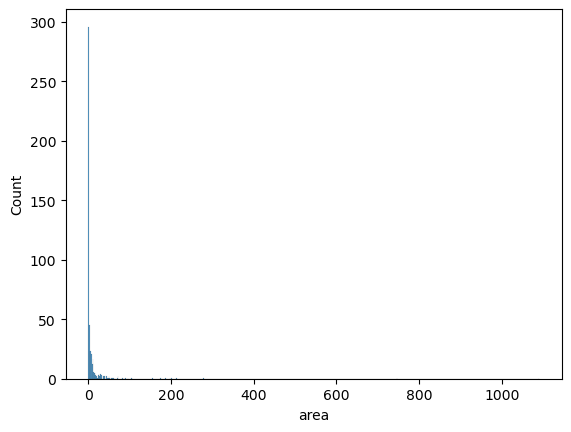

In [155]:
sns.histplot(data=fires,x='area')

So here we can see that there are no clear correlations between area and the other columns, which is probably due to the distribution of the area, as seen in the figure above. But what about if we slightly modify area, in the following ways: 

 - All data except for rows with very high values of area
 - All data except for rows with zero values of area


 Lets start with the first one, and work our way to the bottom

In [160]:
low_area_values = fires[fires['area']< 100]
low_area_values.corr()['area']

X        0.019333
Y        0.018206
month    0.055759
day      0.034364
FFMC     0.041431
DMC      0.035072
DC       0.018154
ISI      0.004947
temp     0.058954
RH      -0.048256
wind     0.071127
rain     0.000784
area     1.000000
Name: area, dtype: float64

In [161]:
non_zero_area_values = fires[fires['area']> 0]
non_zero_area_values.corr()['area']

X        0.070316
Y        0.050242
month    0.047565
day      0.044566
FFMC     0.054323
DMC      0.089088
DC       0.046735
ISI      0.002121
temp     0.110293
RH      -0.104846
wind     0.002086
rain    -0.012901
area     1.000000
Name: area, dtype: float64

#### **Slightly higher correlation when dropping the zero values. When dropping the large values, the correlation is not visibly higher**


This could either mean that:
 - The area is not a good indicator of severity of the fire, or
 - There is no real correlation between the columns that we have and how severe the fire will be.


 For future studies, I suggest that some feature engineering on the columns could be done, e.g. where RH and temperature is combined. 